# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 21:**  
Period = 18.6299209544  
tdepth = 0.0393395830**2
   
  - **Sector 47:**  
Period = 18.6299372217   
tdepth = 0.0399206012**2

In [5]:
ID = 29169215
sectors = np.array([21])

period = 18.6299209544
tdepth = 0.0393395830**2

lc = pd.read_csv("TOI_5584_21.csv", header=None)

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

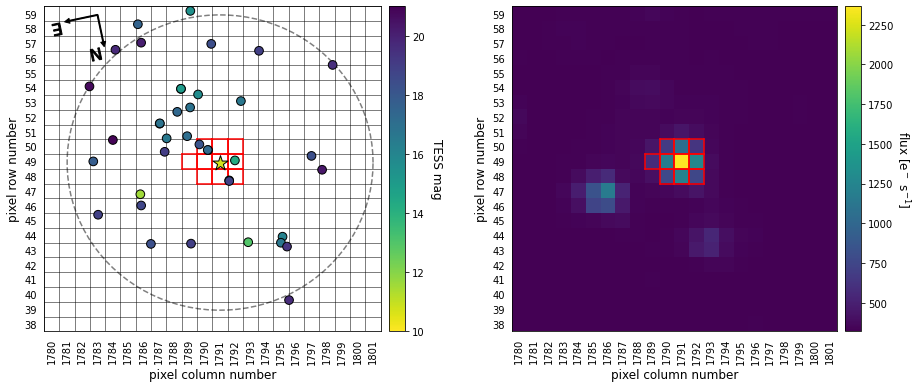

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,29169215,10.7314,9.624,8.995,8.858,135.324483,47.452407,0.640000,0.745090,4092.40,14.450500,0.000,0.000
1,29169214,14.3273,13.604,13.201,13.179,135.316620,47.452722,0.950000,0.765751,5433.00,1.404920,19.174,273.394
2,10000567875,17.0420,15.292,14.515,13.776,135.328705,47.447266,NaN,NaN,NaN,NaN,21.170,150.951
3,29169216,17.2900,16.010,15.236,14.687,135.328835,47.447189,NaN,NaN,NaN,NaN,21.566,150.573
4,10000567870,15.4470,14.548,13.926,13.886,135.322556,47.459209,NaN,NaN,NaN,NaN,24.933,349.158
5,29169213,18.8413,15.655,14.929,14.490,135.322628,47.459423,NaN,NaN,NaN,NaN,25.659,349.868
6,802113689,18.1455,NaN,NaN,NaN,135.332253,47.444693,NaN,NaN,NaN,-0.050174,33.600,145.733
7,29171216,17.0875,16.573,16.043,15.761,135.337218,47.440984,0.980000,0.705374,5541.00,0.200497,51.500,142.979
8,802113685,19.0360,NaN,NaN,NaN,135.351000,47.444772,NaN,NaN,3927.00,-0.202861,70.164,113.053
9,29171215,16.5329,15.501,14.804,14.659,135.347965,47.440282,0.680000,0.544166,4337.00,1.152270,71.928,127.352


In [4]:
ap = np.array([[1790, 48],
[1791, 48],
[1792, 48],
[1789, 49],
[1790, 49],
[1791, 49],
[1792, 49],
[1790, 50],
[1791, 50],
[1792, 50]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [6]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,29169215,10.7314,9.624,8.995,8.858,135.324483,47.452407,0.640000,0.745090,4092.40,14.450500,0.000,0.000,9.599875e-01,0.001612
1,29169214,14.3273,13.604,13.201,13.179,135.316620,47.452722,0.950000,0.765751,5433.00,1.404920,19.174,273.394,2.734455e-02,0.056596
2,10000567875,17.0420,15.292,14.515,13.776,135.328705,47.447266,NaN,NaN,NaN,NaN,21.170,150.951,2.317247e-03,0.667863
3,29169216,17.2900,16.010,15.236,14.687,135.328835,47.447189,NaN,NaN,NaN,NaN,21.566,150.573,1.826102e-03,0.847490
4,10000567870,15.4470,14.548,13.926,13.886,135.322556,47.459209,NaN,NaN,NaN,NaN,24.933,349.158,7.329461e-03,0.211148
5,29169213,18.8413,15.655,14.929,14.490,135.322628,47.459423,NaN,NaN,NaN,NaN,25.659,349.868,3.102093e-04,0.000000
6,802113689,18.1455,NaN,NaN,NaN,135.332253,47.444693,NaN,NaN,NaN,-0.050174,33.600,145.733,5.181142e-04,0.000000
7,29171216,17.0875,16.573,16.043,15.761,135.337218,47.440984,0.980000,0.705374,5541.00,0.200497,51.500,142.979,3.041119e-04,0.000000
8,802113685,19.0360,NaN,NaN,NaN,135.351000,47.444772,NaN,NaN,3927.00,-0.202861,70.164,113.053,1.300410e-05,0.000000
9,29171215,16.5329,15.501,14.804,14.659,135.347965,47.440282,0.680000,0.544166,4337.00,1.152270,71.928,127.352,4.398624e-05,0.000000


In [7]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

29169214
10000567875
29169216
10000567870


# Calculating FPP & NFPP

In [8]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 29169215.
Calculating EB and EBx2P scenario probabilities for 29169215.
Calculating PTP scenario probability for 29169215.
Calculating PEB and PEBx2P scenario probabilities for 29169215.
Calculating STP scenario probability for 29169215.
Calculating SEB and SEBx2P scenario probabilities for 29169215.
Calculating DTP scenario probability for 29169215.
Calculating DEB and DEBx2P scenario probabilities for 29169215.
Calculating BTP scenario probability for 29169215.
Calculating BEB and BEBx2P scenario probabilities for 29169215.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 29169214.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 10000567875.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 29169216.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 10000567870.
Wall time: 17min 39s


In [9]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.020164456476811643
NFPP =  0.007380175481897985


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,29169215,TP,0.640000,0.745090,18.629921,89.032745,0.711414,0.238881,259.213448,3.266342,0.000000,0.000000,8.241859e-01
1,29169215,EB,0.640000,0.745090,18.629921,86.432627,1.444953,0.468064,64.124568,0.000000,0.567010,0.574943,1.120427e-30
2,29169215,EBx2P,0.640000,0.745090,37.259842,89.095904,0.514315,0.680963,170.040949,0.000000,0.613587,0.599972,1.352680e-05
3,29169215,PTP,0.640000,0.745090,18.629921,89.002229,0.568182,0.126866,165.646550,4.682030,0.000000,0.000000,1.030631e-01
4,29169215,PEB,0.640000,0.745090,18.629921,86.600175,1.752063,0.363921,40.776985,0.000000,0.557376,0.566304,5.772048e-32
5,29169215,PEBx2P,0.640000,0.745090,37.259842,89.135040,0.376247,0.767389,170.748006,0.000000,0.622906,0.600658,8.021846e-05
6,29169215,STP,0.581225,0.585842,18.629921,89.796728,0.139316,0.072711,112.528580,4.159965,0.000000,0.000000,1.183668e-02
7,29169215,SEB,0.173819,0.205601,18.629921,89.178081,0.089308,0.950678,156.703794,0.000000,0.063366,0.100000,1.208165e-09
8,29169215,SEBx2P,0.114654,0.140074,37.259842,89.783639,0.175325,0.847811,163.950169,0.000000,0.110189,0.134163,1.932272e-06
9,29169215,DTP,0.640000,0.745090,18.629921,88.948768,0.506096,0.303153,155.435935,3.490530,0.000000,0.000000,5.258654e-02


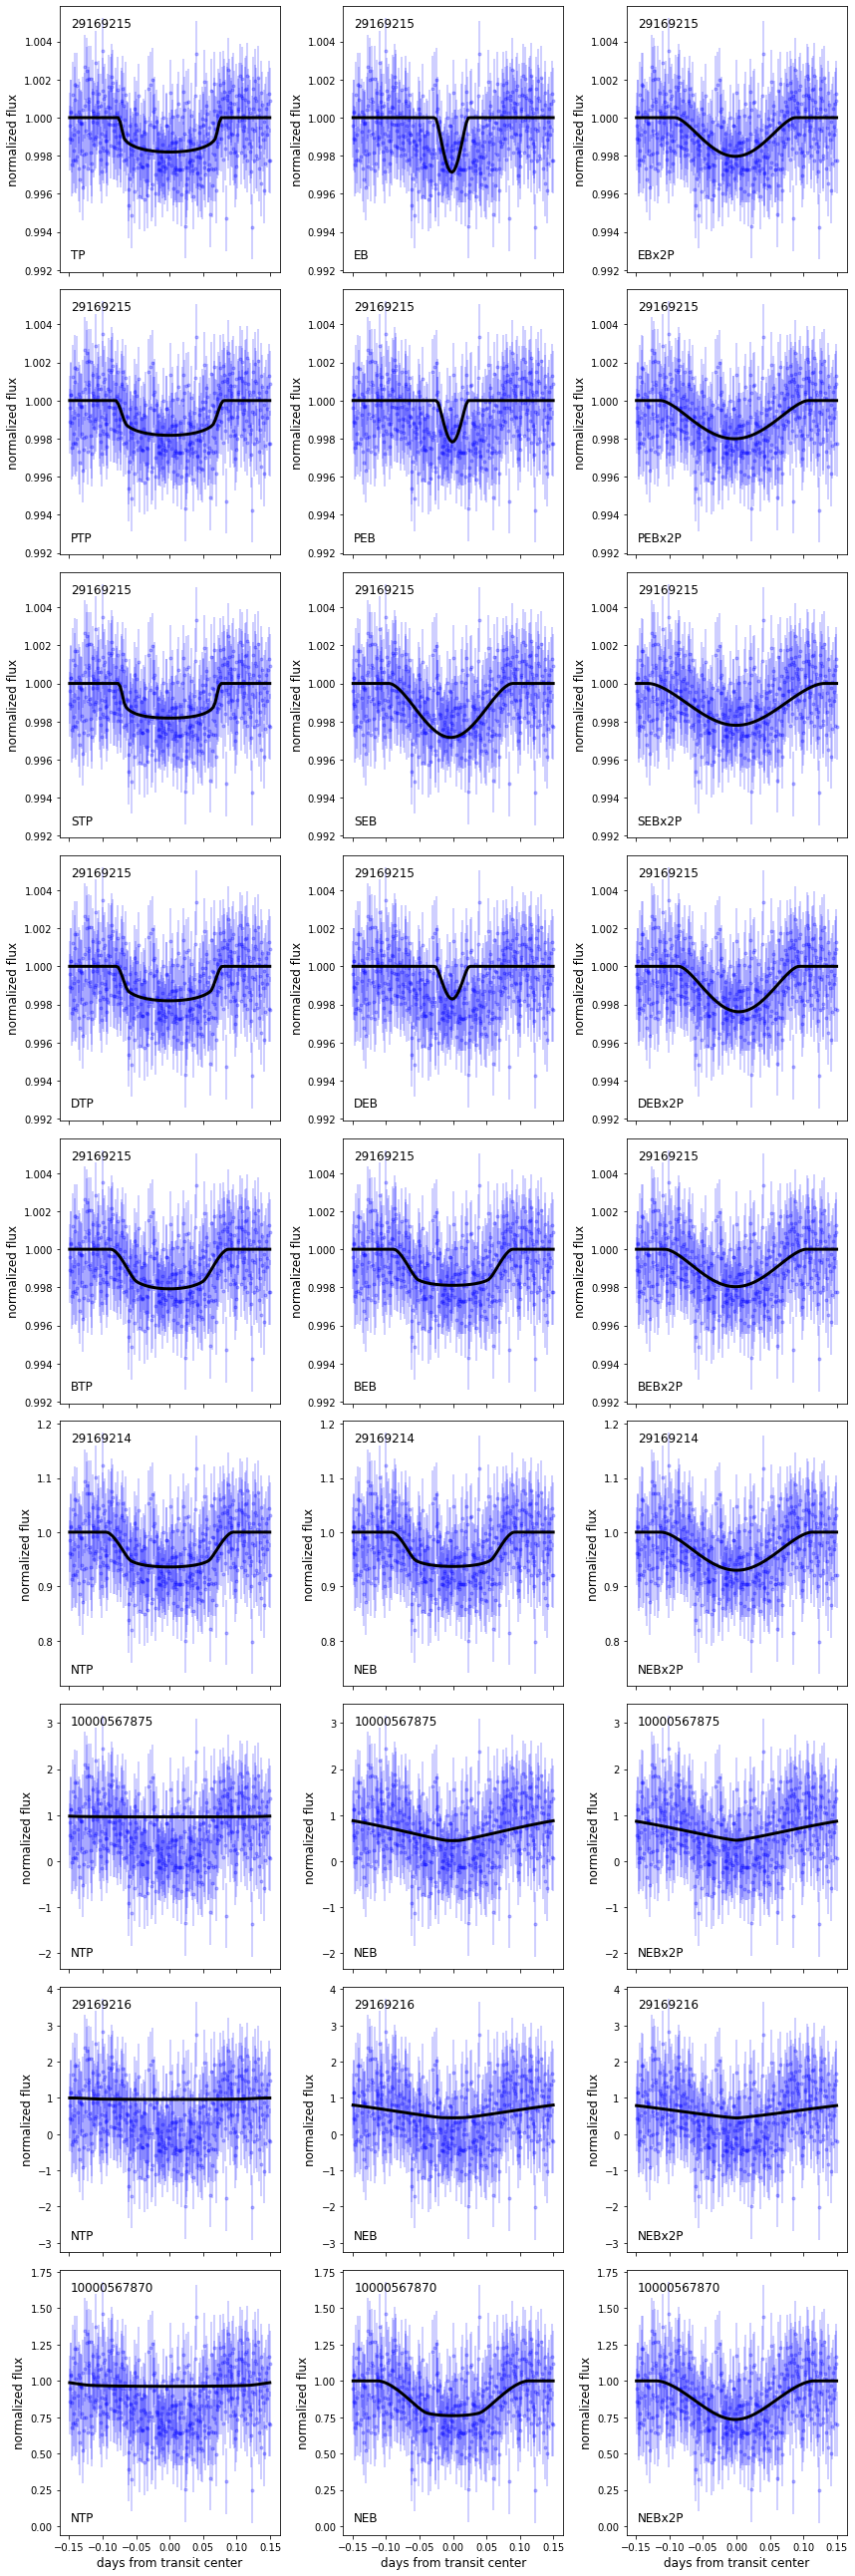

In [10]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))